In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
import os
import datetime as dt
import matplotlib.dates as mdates

#Quarterly to monthly profits using interpolate

end_date_quarterly = '6/1/2023'
dates = pd.date_range(start="2001-01-01", end=end_date_quarterly, freq='Q')
list_important_dates = ['2020-03-01', '2018-07-01']
list_pandemic = ["02-01-2021"]

def quarterly_to_monthly(indicator_array, name, dates):
    quarterly = pd.Series(data=indicator_array, index=dates)

    #Creating monthly placeholders
    monthly = quarterly.asfreq('M', how='start') # to month-end frequency
    monthly = monthly.to_frame(name) # to DataFrame
    monthly = monthly.interpolate(method='spline', order=3).reset_index()
    monthly['Date'] = pd.date_range(start='3/1/2001', end='3/1/2023', freq='MS')
    monthly.drop(columns=['index'], inplace=True)
    return monthly

def calculate_rmse(y_true, y_pred):

   #Calculates the root mean squared error (RMSE) between two arrays.

   #Args:
   #  y_true: The actual values.
   #  y_pred: The predicted values.

   #Returns:
   #  The RMSE between the two arrays.

  residuals = y_true - y_pred
  squared_residuals = residuals**2
  mean_squared_residuals = np.mean(squared_residuals)
  rmse = np.sqrt(mean_squared_residuals)
  return rmse

def calculate_score(y_true, y_pred, variance):
  #Calculates the score of an LSTM model that matches the MLPRegressor.score method.

  #Args:
  #  y_true: The actual values.
  #  y_pred: The predicted values.
  #  variance: The variance of the test dataset.

  #Returns:
  #  The score of the LSTM model.

  # Calculate the MSE.
  mse = np.mean((y_true - y_pred)**2)

  # Calculate the score.
  score = 1 - (mse / variance)

  return score

In [ ]:
warnings.filterwarnings('ignore')
drive.mount("/content/drive", force_remount=True)

path = "drive/MyDrive/InSpirit AI 2023/Data Files" #You will need to replace this with your own link to you local drive

#List of available documents
documents = os.listdir(path) #list of all normal images

print(documents)

GDP = pd.read_excel(path + '/'+ 'FRED - US GDP.xls')

exports = pd.read_excel(path + '/'+ 'GACC - Electronic China Exports to US - All Data - Date Fix.xlsx')

RetailProfits = pd.read_excel(path + '/'+ 'Corporate profits with inventory valuation adjustments Domestic industries Nonfinancial Retail trade N415RC1Q027SBEA.xlsx')

Manufacturing = pd.read_excel(path + '/'+ 'Corporate profits with inventory valuation adjustments Domestic industries Nonfinancial Manufacturing electronic products  N501RC1Q027SBEA.xlsx')

Price = pd.read_excel(path + '/'+ 'Producer Price Index by Industry Electrical Equipment Manufacturing PCU3353133531.xlsx')

SupplyChainPressure = pd.read_excel(path + '/'+ 'Global Supply Chain Pressure Index (GSCPI).xlsx')

Mounted at /content/drive
['FRED - US GDP.xls', 'Global Supply Chain Pressure Index (GSCPI).xlsx', 'Producer Price Index by Industry Electrical Equipment Manufacturing PCU3353133531.xlsx', 'GACC - Electronic China Exports to US - All Data - Date Fix.xlsx', 'Corporate profits with inventory valuation adjustments Domestic industries Nonfinancial Retail trade N415RC1Q027SBEA.xlsx', 'Corporate profits with inventory valuation adjustments Domestic industries Nonfinancial Manufacturing electronic products  N501RC1Q027SBEA.xlsx']


In [ ]:
GDP.head()

,DATE,GDP (BILLIONS),GDP (Dollars)
0,2015-01-01,17991.348,17991348000000
1,2015-04-01,18193.707,18193707000000
2,2015-07-01,18306.960,18306960000000
3,2015-10-01,18332.079,18332079000000
4,2016-01-01,18425.306,18425306000000


In [ ]:
exports.head()

,Date of data,MONTH,DAY,YEAR,DATE,Trading partner code,Trading partner,Commodity code,Commodity,US dollar,SupplyChainPressureIndex
0,201501,1,1,2015,2015-01-01,502,United States,85,Electrical machinery and equipment and parts t...,7892312705,-0.36
1,201502,2,1,2015,2015-02-01,502,United States,85,Electrical machinery and equipment and parts t...,5988045473,-0.48
2,201503,3,1,2015,2015-03-01,502,United States,85,Electrical machinery and equipment and parts t...,6158130389,-0.31
3,201504,4,1,2015,2015-04-01,502,United States,85,Electrical machinery and equipment and parts t...,7177877837,-0.38
4,201505,5,1,2015,2015-05-01,502,United States,85,Electrical machinery and equipment and parts t...,7930006350,-0.32


In [ ]:
RetailProfits.head()
RetailProfits.tail()

,observation_date,CORPORATE PROFIT (Billions),CORPORATE PROFILE (Dollars)
84,2022-01-01,297.277,297277000000
85,2022-04-01,307.433,307433000000
86,2022-07-01,311.984,311984000000
87,2022-10-01,321.793,321793000000
88,2023-01-01,340.059,340059000000


In [ ]:
Manufacturing.head()

,observation_date,CORPORATE PROFIT (Billions),CORPORATE PROFILE (Dollars)
0,2001-01-01,-2.589,-2589000000
1,2001-04-01,-15.523,-15523000000
2,2001-07-01,-37.700,-37700000000
3,2001-10-01,-60.779,-60779000000
4,2002-01-01,-35.448,-35448000000


In [ ]:
Price.head()

,observation_date,INDEX
0,2003-12-01,100.0
1,2004-01-01,100.2
2,2004-02-01,99.9
3,2004-03-01,100.5
4,2004-04-01,100.9


In [ ]:
SupplyChainPressure.head()

,Date String,Date,Index
0,31-Jan-1998,1998-02-01,-0.925572
1,28-Feb-1998,1998-03-01,-0.432661
2,31-Mar-1998,1998-04-01,-0.087695
3,30-Apr-1998,1998-05-01,-0.134612
4,31-May-1998,1998-06-01,-0.508128


Text(0, 0.5, 'GDP (Billions)')

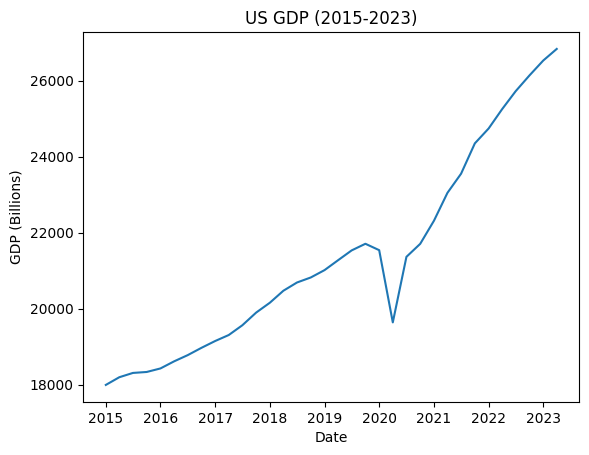

In [ ]:
plt.plot('DATE', 'GDP (BILLIONS)', data=GDP)

plt.title("US GDP (2015-2023)")
plt.xlabel("Date")
plt.ylabel("GDP (Billions)")

Text(0, 0.5, 'US Dollar (Billions)')

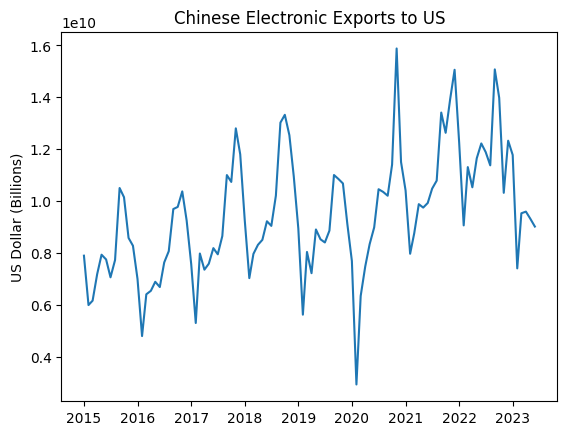

In [ ]:
plt.plot('DATE', 'US dollar', data=exports)

plt.title("Chinese Electronic Exports to US")
#plt.xlabel("Date")
plt.ylabel("US Dollar (Billions)")

Text(0, 0.5, 'Corporate Profit (Billions)')

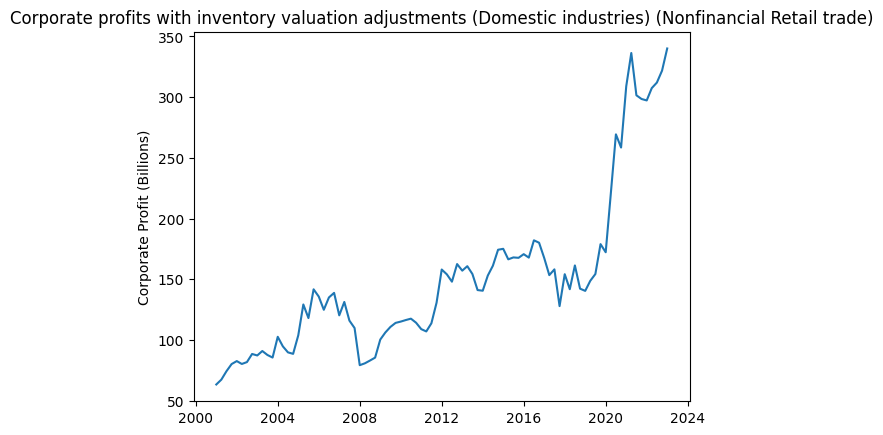

In [ ]:
plt.plot('observation_date', 'CORPORATE PROFIT (Billions)', data=RetailProfits)

plt.title("Corporate profits with inventory valuation adjustments (Domestic industries) (Nonfinancial Retail trade)")
#plt.xlabel("Date")
plt.ylabel("Corporate Profit (Billions)")

Text(0, 0.5, 'Corporate Profit (Billions)')

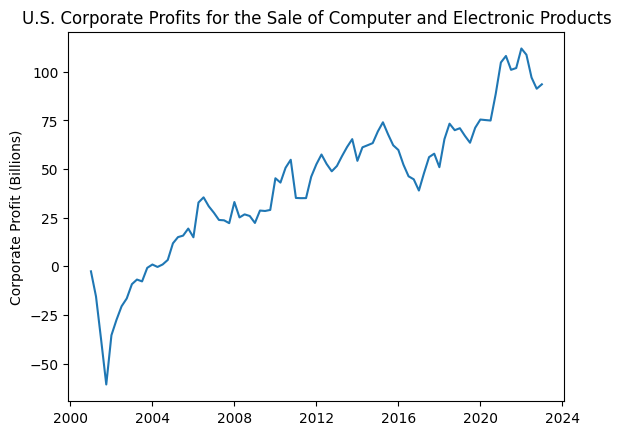

In [ ]:
plt.plot('observation_date', 'CORPORATE PROFIT (Billions)', data=Manufacturing)
plt.title("U.S. Corporate Profits for the Sale of Computer and Electronic Products")
#plt.title("Corporate profits with inventory valuation adjustments (Domestic industries) (Nonfinancial) (Computer and electronic products)")
#plt.xlabel("Date")
plt.ylabel("Corporate Profit (Billions)")

Text(0, 0.5, 'Index')

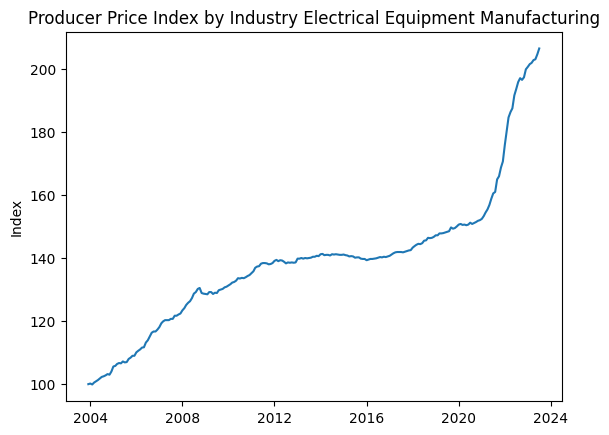

In [ ]:
plt.plot('observation_date', 'INDEX', data=Price)

plt.title("Producer Price Index by Industry Electrical Equipment Manufacturing")
#plt.xlabel("Date")
plt.ylabel("Index")

Text(0, 0.5, 'Pressure Index')

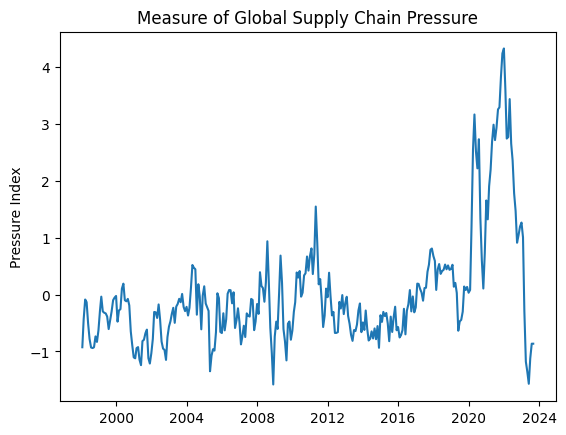

In [ ]:
plt.plot('Date', 'Index', data=SupplyChainPressure)

plt.title("Measure of Global Supply Chain Pressure")
#plt.xlabel("Date")
plt.ylabel("Pressure Index")

In [ ]:
quarter_series = np.array(Manufacturing['CORPORATE PROFIT (Billions)'][0:])
profits_monthly = quarterly_to_monthly(quarter_series, 'CORPORATE PROFIT (Billions)', dates)
profits_monthly['Growth_Rate'] = profits_monthly['CORPORATE PROFIT (Billions)'].pct_change(periods=12) * 100
profits_monthly.tail()
# Count NA Values
#nan_count = profits_monthly.isna().sum(axis = 1).sum()
#print(nan_count)

profits_monthly=profits_monthly.dropna()

#Adding important_dates dummy column
exports['important_dates'] = np.where(exports['DATE'].isin(list_important_dates),1,0)
exports['COVID_19'] = np.where(exports['DATE'].isin(list_pandemic),1,0)

profits_monthly.head()
nan_count = profits_monthly.isna().sum(axis = 1).sum()
#print(nan_count)

In [ ]:
exports['Growth_Rate'] = exports['US dollar'].pct_change(periods=12) * 100
exports.tail()

,Date of data,MONTH,DAY,YEAR,DATE,Trading partner code,Trading partner,Commodity code,Commodity,US dollar,SupplyChainPressureIndex,important_dates,COVID_19,Growth_Rate
97,202302,2,1,2023,2023-02-01,502,United States,85,Electrical machinery and equipment and parts t...,7402641476,1.00,0,0,-18.290112
98,202303,3,1,2023,2023-03-01,502,United States,85,Electrical machinery and equipment and parts t...,9526876277,-0.29,0,0,-15.743746
99,202304,4,1,2023,2023-04-01,502,United States,85,Electrical machinery and equipment and parts t...,9591191844,-1.18,0,0,-8.901648
100,202305,5,1,2023,2023-05-01,502,United States,85,Electrical machinery and equipment and parts t...,9317185332,-1.35,0,0,-20.000407
101,202306,6,1,2023,2023-06-01,502,United States,85,Electrical machinery and equipment and parts t...,9015565401,-1.57,0,0,-26.220059


In [ ]:
#Adding important_dates dummy column
exports['important_dates'] = np.where(exports['DATE'].isin(list_important_dates),1,0)


In [ ]:
exports=exports.dropna()
exports.tail()


,Date of data,MONTH,DAY,YEAR,DATE,Trading partner code,Trading partner,Commodity code,Commodity,US dollar,SupplyChainPressureIndex,important_dates,COVID_19,Growth_Rate
97,202302,2,1,2023,2023-02-01,502,United States,85,Electrical machinery and equipment and parts t...,7402641476,1.00,0,0,-18.290112
98,202303,3,1,2023,2023-03-01,502,United States,85,Electrical machinery and equipment and parts t...,9526876277,-0.29,0,0,-15.743746
99,202304,4,1,2023,2023-04-01,502,United States,85,Electrical machinery and equipment and parts t...,9591191844,-1.18,0,0,-8.901648
100,202305,5,1,2023,2023-05-01,502,United States,85,Electrical machinery and equipment and parts t...,9317185332,-1.35,0,0,-20.000407
101,202306,6,1,2023,2023-06-01,502,United States,85,Electrical machinery and equipment and parts t...,9015565401,-1.57,0,0,-26.220059


In [ ]:
exports.head()

,Date of data,MONTH,DAY,YEAR,DATE,Trading partner code,Trading partner,Commodity code,Commodity,US dollar,SupplyChainPressureIndex,important_dates,COVID_19,Growth_Rate
12,201601,1,1,2016,2016-01-01,502,United States,85,Electrical machinery and equipment and parts t...,6995990383,-0.57,0,0,-11.356903
13,201602,2,1,2016,2016-02-01,502,United States,85,Electrical machinery and equipment and parts t...,4792668469,-0.75,0,0,-19.962724
14,201603,3,1,2016,2016-03-01,502,United States,85,Electrical machinery and equipment and parts t...,6402933830,-0.71,0,0,3.975288
15,201604,4,1,2016,2016-04-01,502,United States,85,Electrical machinery and equipment and parts t...,6537798507,-0.63,0,0,-8.917390
16,201605,5,1,2016,2016-05-01,502,United States,85,Electrical machinery and equipment and parts t...,6885536407,-0.25,0,0,-13.171111


In [ ]:
profits_monthly.tail()

,CORPORATE PROFIT (Billions),Date,Growth_Rate
260,91.923114,2022-11-01,-9.402048
261,91.322000,2022-12-01,-10.435260
262,91.566791,2023-01-01,-13.232618
263,92.363106,2023-02-01,-14.374824
264,93.594000,2023-03-01,-16.451832


In [ ]:
profits_monthly.head()

,CORPORATE PROFIT (Billions),Date,Growth_Rate
12,-35.448000,2002-03-01,1269.177289
13,-31.414023,2002-04-01,480.674024
14,-28.043026,2002-05-01,190.877707
15,-27.550000,2002-06-01,77.478580
16,-24.707225,2002-07-01,12.860066


In [ ]:
exports.head()

,Date of data,MONTH,DAY,YEAR,DATE,Trading partner code,Trading partner,Commodity code,Commodity,US dollar,SupplyChainPressureIndex,important_dates,COVID_19,Growth_Rate
12,201601,1,1,2016,2016-01-01,502,United States,85,Electrical machinery and equipment and parts t...,6995990383,-0.57,0,0,-11.356903
13,201602,2,1,2016,2016-02-01,502,United States,85,Electrical machinery and equipment and parts t...,4792668469,-0.75,0,0,-19.962724
14,201603,3,1,2016,2016-03-01,502,United States,85,Electrical machinery and equipment and parts t...,6402933830,-0.71,0,0,3.975288
15,201604,4,1,2016,2016-04-01,502,United States,85,Electrical machinery and equipment and parts t...,6537798507,-0.63,0,0,-8.917390
16,201605,5,1,2016,2016-05-01,502,United States,85,Electrical machinery and equipment and parts t...,6885536407,-0.25,0,0,-13.171111


In [ ]:
exports.tail()

,Date of data,MONTH,DAY,YEAR,DATE,Trading partner code,Trading partner,Commodity code,Commodity,US dollar,SupplyChainPressureIndex,important_dates,COVID_19,Growth_Rate
97,202302,2,1,2023,2023-02-01,502,United States,85,Electrical machinery and equipment and parts t...,7402641476,1.00,0,0,-18.290112
98,202303,3,1,2023,2023-03-01,502,United States,85,Electrical machinery and equipment and parts t...,9526876277,-0.29,0,0,-15.743746
99,202304,4,1,2023,2023-04-01,502,United States,85,Electrical machinery and equipment and parts t...,9591191844,-1.18,0,0,-8.901648
100,202305,5,1,2023,2023-05-01,502,United States,85,Electrical machinery and equipment and parts t...,9317185332,-1.35,0,0,-20.000407
101,202306,6,1,2023,2023-06-01,502,United States,85,Electrical machinery and equipment and parts t...,9015565401,-1.57,0,0,-26.220059


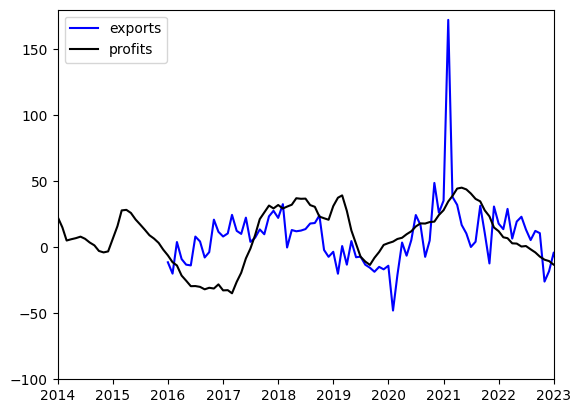

In [ ]:
#Profits vs. Chinese Imports
left = dt.date(2014, 1, 1)
right = dt.date(2023, 1, 1)
plt.plot('DATE', 'Growth_Rate', data=exports, color='b', label="exports")
plt.plot('Date', 'Growth_Rate', data=profits_monthly, color='black', label="profits")
# Changes x-axis range
plt.gca().set_xbound(left, right)
plt.gca().set_ybound(-100, 180)
plt.legend(loc="upper left")
plt.show()

In [ ]:
len(exports)

90

In [ ]:
split_date = pd.datetime(2017,1,1)

profits_monthly = profits_monthly.loc[profits_monthly['Date'] >= split_date]

exports = exports.loc[exports['DATE'] >= split_date]

In [ ]:
split_date = pd.datetime(2023,3,1)

exports = exports.loc[exports['DATE'] <= split_date]

In [ ]:
len(exports)

75

In [ ]:
len(profits_monthly)


75

## SET X and y values for all models below

In [ ]:
#X =  np.array(exports['Growth_Rate'][0:]).reshape(-1, 1)
#X = exports[["Growth_Rate", "important_dates", "COVID_19"]]
#Add Supply_Chain_Inde_Indicator
X = exports[["Growth_Rate", "important_dates", "COVID_19", "SupplyChainPressureIndex"]]
###############################
y = np.array(profits_monthly['Growth_Rate'][0:])

# Linear Regression

0.1573840830669272


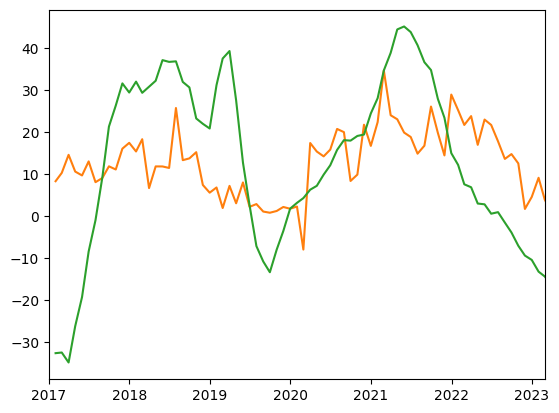

In [ ]:
#Calculate Baseline Model
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_
print(reg.score(X, y))
y_pred = reg.predict(X)
plt.plot(y_pred, color='red')
plt.plot(y)

###################
from datetime import datetime
start_date = datetime.strptime("2017-01-01", "%Y-%m-%d")
date_list = pd.date_range(start_date, periods=75, freq='M')
date_time = pd.to_datetime(date_list)
DF = pd.DataFrame()
DF['y_pred'] = y_pred
DF['y'] = y
DF = DF.set_index(date_time)
plt.plot(DF)
##plt.gcf().autofmt_xdate()
left = dt.date(2017, 1, 1)
right = dt.date(2023, 3, 1)
plt.gca().set_xbound(left, right)
plt.show()
####################


In [ ]:
len(X)

75


# MLP Neural Network


(75,)


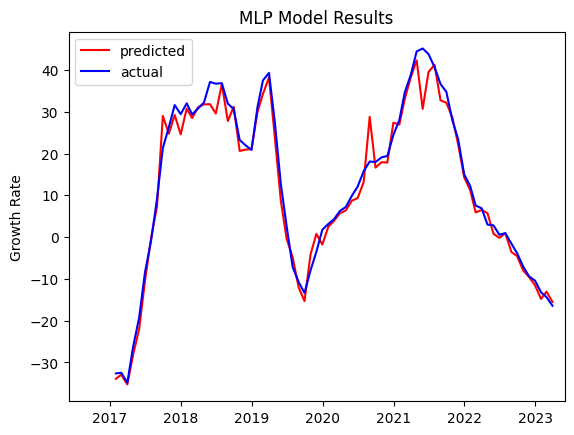

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from sklearn.neural_network import MLPRegressor

#INIT DATA
#TEST 1: Just Growth Rate
#X = exports[["Growth_Rate"]]

#TEST 2: Growth Rate and Important Dates
#X = exports[["Growth_Rate", "important_dates"]]

#TEST 3: Growth Rate, Important Dates, and COVID-19
#X = exports[["Growth_Rate", "important_dates", "COVID_19"]]

#TEST4: Growth Rate, Important Dates, COVID-19, and Supply Chain Index
X = exports[["Growth_Rate", "important_dates", "COVID_19", "SupplyChainPressureIndex"]]

y = np.array(profits_monthly['Growth_Rate'][0:])

#TEST RUNS
#regr = MLPRegressor(random_state=1,  hidden_layer_sizes=(10,10,20), max_iter=10000).fit(X,y) #2sec -> 26.6%
#regr = MLPRegressor(random_state=1, activation="logistic", hidden_layer_sizes=(1000,1000,2000), max_iter=1000).fit(X,y) #2min 14sec -> 51%
#regr = MLPRegressor(random_state=1,  activation="logistic", hidden_layer_sizes=(800,800,2000), max_iter=1000).fit(X,y) #2min 3sec -> 51.6%
#regr = MLPRegressor(random_state=1,  activation="logistic", hidden_layer_sizes=(1200,1200,2000), max_iter=5000, learning_rate='invscaling').fit(X,y) #2min 51sec -> 52.148%
#regr = MLPRegressor(random_state=1,  activation="logistic", hidden_layer_sizes=(1200,1200,5000), max_iter=1000, learning_rate='invscaling').fit(X,y) #3min 15sec -> 50.254%
#Try lowering the learning rate

#FINAL RUN #1: Excluding SupplyChainPressure
#regr = MLPRegressor(random_state=1,  activation="logistic", hidden_layer_sizes=(1200,1200,2000), max_iter=1000).fit(X,y) #2min 51sec -> 52.148% without SupplyChainPressureIndex

#FINAL RUN #2: Including SupplyChainPressure
#Try uncludying supply chain disruptions https://www.newyorkfed.org/research/policy/gscpi#/interactive (try with the growth rate)
regr = MLPRegressor(random_state=1,  activation="logistic", hidden_layer_sizes=(1200,1200,2000), max_iter=1000).fit(X,y) #2min 51sec -> 97.5% with SupplyChainPressureIndex

regr.score(X, y)
y_pred = regr.predict(X)
print(y_pred.shape)
#plt.plot(y_pred, color='red', label="predicted")
#plt.plot(y, color='blue', label="actual")
#plt.legend(loc="upper left")
#plt.title("Neural Network Model Results")
#plt.ylabel("Growth Rate")

###################
from datetime import datetime
start_date = datetime.strptime("2017-01-01", "%Y-%m-%d")
date_list = pd.date_range(start_date, periods=75, freq='M')
date_time = pd.to_datetime(date_list)
DF = pd.DataFrame()
DF['y_pred'] = y_pred
DF['y'] = y
DF = DF.set_index(date_time)
#plt.plot(DF)
plt.plot(DF['y_pred'], color='red', label="predicted")
plt.plot(DF['y'], color='blue', label="actual")
plt.legend(loc="upper left")
plt.title("MLP Model Results")
plt.ylabel("Growth Rate")
##plt.gcf().autofmt_xdate()
left = dt.date(2016, 6, 1)
right = dt.date(2023, 6, 1)
plt.gca().set_xbound(left, right)
plt.show()
####################

In [ ]:
print(regr.score(X,y))
#Coefficient of determination: how much of your variation in y (profits) is explained by your model, goal (80-90%).
print('Coefficient of determination: ', regr.score(X, y))
print('MSE: ', mean_squared_error(y, y_pred))
print('Percentage of error: ', np.sqrt(mean_squared_error(y, y_pred))/np.mean(y)) #want to keep this below 10%

# Calculate the RMSE.
rmse = calculate_rmse(y, y_pred)
print('RMSE:', rmse)


0.9752247429248397
Coefficient of determination:  0.9752247429248397
MSE:  10.175859812004315
Percentage of error:  0.2477713256761114
RMSE: 3.189962352756583


## LSTM Neural Network: Advanced Model

In [ ]:


#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import LSTM
#from tensorflow.keras.layers import Dropout
#from keras.preprocessing.sequence import TimeseriesGenerator

#Create lag of the variable: LSTM networks are able to learn long-term dependencies in data, so they can theoretically learn the relationships between variables that are far apart in time.
 #However, in practice, it can be helpful to provide the network with some explicit information about the past values of the variables.
 # This can help the network to learn more quickly and accurately.





(75, 4, 1)
(75,)
Epoch 1/32
17/17 [==============================] - 5s 73ms/step - loss: 496.6048 - val_loss: 329.4644
Epoch 2/32
17/17 [==============================] - 1s 37ms/step - loss: 454.8016 - val_loss: 361.2581
Epoch 3/32
17/17 [==============================] - 1s 38ms/step - loss: 377.4283 - val_loss: 325.9417
Epoch 4/32
17/17 [==============================] - 1s 35ms/step - loss: 450.9948 - val_loss: 347.2544
Epoch 5/32
17/17 [==============================] - 1s 31ms/step - loss: 373.8699 - val_loss: 428.6561
Epoch 6/32
17/17 [==============================] - 0s 22ms/step - loss: 349.1118 - val_loss: 451.0688
Epoch 7/32
17/17 [==============================] - 0s 20ms/step - loss: 335.0880 - val_loss: 640.5711
Epoch 8/32
17/17 [==============================] - 0s 23ms/step - loss: 398.1953 - val_loss: 381.3994
Epoch 9/32
17/17 [==============================] - 0s 23ms/step - loss: 332.6995 - val_loss: 441.7818
Epoch 10/32
17/17 [==============================] - 0s 

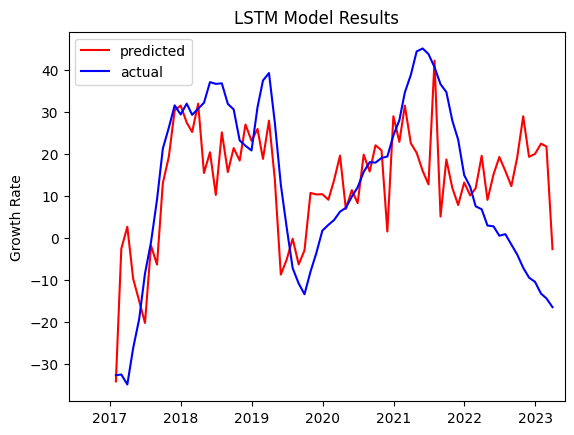

Score: -0.4173073344230951
MSE:  261.6456458789259
Percentage of error:  1.2563835538217636
RMSE: 24.12728699249048
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4, 125)            250       
                                                                 
 lstm (LSTM)                 (None, 280)               454720    
                                                                 
 dense_1 (Dense)             (None, 125)               35125     
                                                                 
 dense_2 (Dense)             (None, 125)               15750     
                                                                 
 dense_3 (Dense)             (None, 125)               15750     
                                                                 
 dense_4 (Dense)             (None, 125)               15750     
      

In [ ]:
import tensorflow as tf
import keras
from keras import layers

from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.preprocessing.sequence import TimeseriesGenerator

import torch.optim as optim
import torch.utils.data as data

profits_monthly['Growth_Rate']
profits_monthly['shifted_profits'] = profits_monthly['Growth_Rate'].shift(-1)

#correction
#INIT DATA
#TEST 1: Just Growth Rate
#X = exports[["Growth_Rate"]]

#TEST 2: Growth Rate and Important Dates
#X = exports[["Growth_Rate", "important_dates"]]

#TEST 3: Growth Rate, Important Dates, and COVID-19
#X = exports[["Growth_Rate", "important_dates", "COVID_19"]]

#TEST4: Growth Rate, Important Dates, COVID-19, and Supply Chain Index
X = exports[["Growth_Rate", "important_dates", "COVID_19", "SupplyChainPressureIndex"]]

y = np.array(profits_monthly['Growth_Rate'][0:])

X = X.values.reshape(75, 4, 1)



##model.add(Dense(120, activation = 'linear'))

#RNN cell takes in two inputs, output from the last hidden state and observation at time = t
#
#Cell state: The cell state is the long-term memory of the LSTM. It stores information about the past that is relevant to the current prediction.
#The cell state can be updated or forgotten at each time step.

#Input gate: The input gate controls how much new information is added to the cell state at each time step.
# It takes the current input and the previous cell state as input and outputs a value between 0 and 1. A value of 1 means that all of the new information
#is added to the cell state, while a value of 0 means that none of the new information is added to the cell state.

#Forget gate: The forget gate controls how much of the previous cell state is forgotten at each time step. It takes the current input and
# the previous cell state as input and outputs a value between 0 and 1. A value of 1 means that all of the previous cell state is forgotten,
# while a value of 0 means that none of the previous cell state is forgotten.

#Output gate: The output gate controls how much of the cell state is output at each time step.
# It takes the current input and the current cell state as input and outputs a value between 0 and 1.
#A value of 1 means that all of the cell state is output, while a value of 0 means that none of the cell state is output.

#Hidden state: The hidden state is the output of the LSTM at each time step. It is a summary of the
# information that the LSTM has learned about the input sequence up to that point. The hidden state is used as input to the next time step of the LSTM.

#The LSTM works by iteratively applying the input gate, forget gate, and output gate to the cell state.
#At each time step, the LSTM reads the current input, updates the cell state, and outputs the hidden state.
#The hidden state is then used as input to the next time step of the LSTM.

#Link to TensorFlow example: https://www.tensorflow.org/guide/keras/sequential_model

model = Sequential()
model.add(Dense(125, activation = 'linear'))
model.add(LSTM(280, activation = 'sigmoid', recurrent_activation='elu', return_sequences=False)) #explain RELU
##model.add(LSTM(20, activation = 'relu', return_sequences=False)) #explain RELU
##model.add(Dropout(0.2)) #address the problem of overfitting
model.add(Dense(125, activation = 'linear'))
model.add(Dense(125, activation = 'linear'))
model.add(Dense(125, activation = 'linear'))
model.add(Dense(125, activation = 'linear'))

model.add(Dropout(0.65)) #address the problem of overfitting
##model.add(Dense(10, activation = 'linear'))
model.add(Dense(1, activation = 'linear')) #Don't modify
model.compile(loss='mean_squared_error', optimizer='adam')

print(X.shape)
print(y.shape)

model.fit(X, y, epochs=32, validation_split=0.33, batch_size=3)
##model.fit(X, y, epochs=31, validation_split=0.33)


y_pred = model.predict(X)
#print (y_pred.shape)
#print (y_pred)
print(model.evaluate(X,y))

#plt.plot(y_pred, color='red', label="predicted")
#plt.plot(y, color='blue', label="actual")
#plt.legend(loc="upper left")
#plt.title("LSTM Model Results")
#plt.ylabel("Growth Rate")

###################
from datetime import datetime
start_date = datetime.strptime("2017-01-01", "%Y-%m-%d")
date_list = pd.date_range(start_date, periods=75, freq='M')
date_time = pd.to_datetime(date_list)
DF = pd.DataFrame()
DF['y_pred'] = y_pred.flatten()
DF['y'] = y
DF = DF.set_index(date_time)
#plt.plot(DF)
plt.plot(DF['y_pred'], color='red', label="predicted")
plt.plot(DF['y'], color='blue', label="actual")
plt.legend(loc="upper left")
plt.title("LSTM Model Results")
plt.ylabel("Growth Rate")
##plt.gcf().autofmt_xdate()
left = dt.date(2016, 6, 1)
right = dt.date(2023, 6, 1)
plt.gca().set_xbound(left, right)
plt.show()
####################

#calculate the score
variance = np.var(y)
score = calculate_score(y, y_pred, variance)
print('Score:', score)

#print('Coefficient of determination: ', model.score(X, y))
print('MSE: ', mean_squared_error(y, y_pred))
print('Percentage of error: ',np.sqrt(mean_squared_error(y, y_pred))/np.mean(y))
# Calculate the RMSE.
rmse = calculate_rmse(y, y_pred)
print('RMSE:', rmse)
print(model.summary())


Epoch 1/32
17/17 [==============================] - 0s 26ms/step - loss: 185.7443 - val_loss: 417.5726
Epoch 2/32
17/17 [==============================] - 0s 29ms/step - loss: 181.3166 - val_loss: 446.4126
Epoch 3/32
17/17 [==============================] - 0s 27ms/step - loss: 178.2755 - val_loss: 422.2915
Epoch 4/32
17/17 [==============================] - 0s 25ms/step - loss: 168.2949 - val_loss: 455.8049
Epoch 5/32
17/17 [==============================] - 0s 27ms/step - loss: 172.3055 - val_loss: 423.6236
Epoch 6/32
17/17 [==============================] - 0s 27ms/step - loss: 164.4026 - val_loss: 425.6360
Epoch 7/32
17/17 [==============================] - 0s 27ms/step - loss: 161.9432 - val_loss: 434.6061
Epoch 8/32
17/17 [==============================] - 0s 24ms/step - loss: 189.3779 - val_loss: 414.0631
Epoch 9/32
17/17 [==============================] - 0s 20ms/step - loss: 259.5020 - val_loss: 408.1242
Epoch 10/32
17/17 [==============================] - 0s 23ms/step - loss:

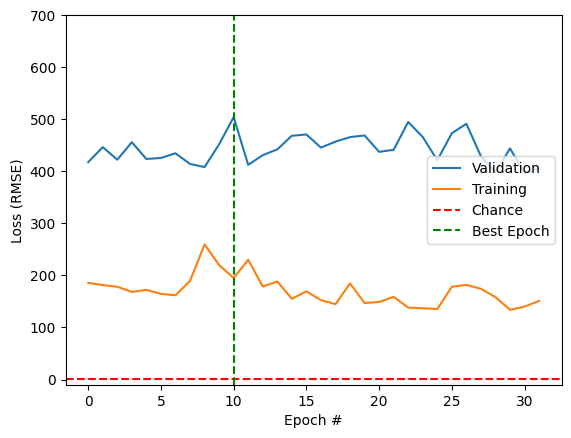

In [ ]:
def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_loss'])))})
    history = pd.DataFrame.from_dict(history)
    best_epoch = history.sort_values(by = 'val_loss', ascending = False).iloc[0]['epoch']
    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_loss', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'loss', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')
    ax.legend(loc = 7)
    ax.set_ylim([-10, 700])
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Loss (RMSE)')
    plt.show()

history = model.fit(X, y, epochs=32, validation_split=0.33, batch_size=3)
plot_acc(history)








